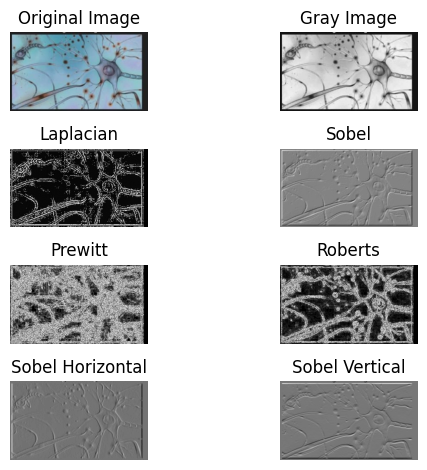

In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.ndimage import convolve 
from scipy import ndimage 
import os 


def safe_imread(filename): 
    if not os.path.exists(filename): 
        raise FileNotFoundError(f"File '{filename}' not found.") 
    return cv2.imread(filename) 

r 
def laplacian_filter(img, alpha=0.05): 
    kernel = np.array([[0, 1, 0], [1, -4 + alpha, 1], [0, 1, 0]]) 
    return convolve(img, kernel) 


try: 
     
    i = safe_imread('neuron.jpg') 
   
    plt.subplot(4, 2, 1) 
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB)) 
    plt.title('Original Image') 
    plt.axis('off') 
    
     
    g = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY) 
    
   
    plt.subplot(4, 2, 2) 
    plt.imshow(g, cmap='gray') 
    plt.title('Gray Image') 
    plt.axis('off') 
    
     
    f = laplacian_filter(g, alpha=0.05) 
    
    
    plt.subplot(4, 2, 3) 
    plt.imshow(f, cmap='gray') 
    plt.title('Laplacian') 
    plt.axis('off') 
    
   
    s = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3) + cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3) 
    
   
    plt.subplot(4, 2, 4) 
    plt.imshow(s, cmap='gray') 
    plt.title('Sobel') 
    plt.axis('off') 
    
     
    kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]) 
    kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 
    px = convolve(g, kernelx) 
    py = convolve(g, kernely) 
    p = np.sqrt(px**2 + py**2) 
    
   
    plt.subplot(4, 2, 5) 
    plt.imshow(p, cmap='gray') 
    plt.title('Prewitt') 
    plt.axis('off') 
    
     
    kernelx = np.array([[1, 0], [0, -1]]) 
    kernely = np.array([[0, 1], [-1, 0]]) 
    rx = convolve(g, kernelx) 
    ry = convolve(g, kernely) 
    r = np.sqrt(rx**2 + ry**2) 
    
   
    plt.subplot(4, 2, 6) 
    plt.imshow(r, cmap='gray') 
    plt.title('Roberts') 
    plt.axis('off') 
    
    
    sobel_horizontal = cv2.Sobel(g, cv2.CV_64F, 1, 0, ksize=3) 
    
    
    plt.subplot(4, 2, 7) 
    plt.imshow(sobel_horizontal, cmap='gray') 
    plt.title('Sobel Horizontal') 
    plt.axis('off') 
    

    sobel_vertical = cv2.Sobel(g, cv2.CV_64F, 0, 1, ksize=3) 
    

    plt.subplot(4, 2, 8) 
    plt.imshow(sobel_vertical, cmap='gray') 
    plt.title('Sobel Vertical') 
    plt.axis('off') 
    
    plt.tight_layout() 
    plt.show() 
except FileNotFoundError as e: 
    print(e)
